In [38]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


(array([  10.,    0.,   53.,    0.,  681.,    0.,  638.,    0.,  199.,   18.]),
 array([ 3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ]),
 <a list of 10 Patch objects>)

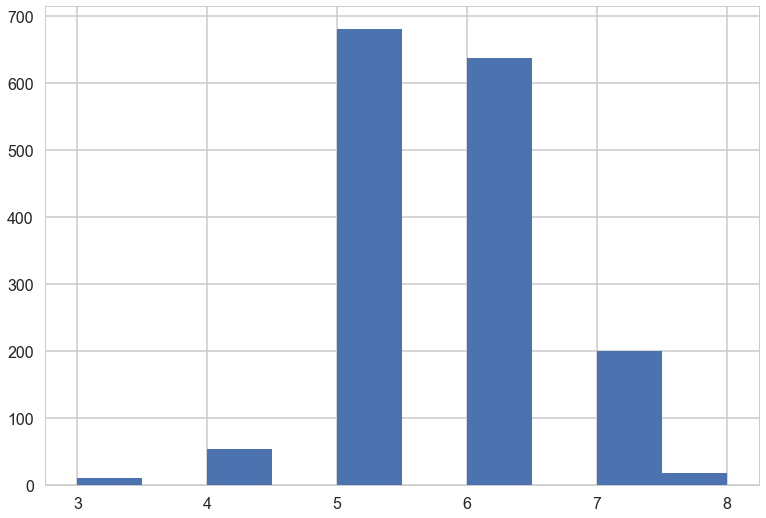

In [5]:
plt.hist(df['quality'])

In [6]:
Y = df.quality.values
X = df.drop(['quality'], axis = 1)
Y = np.array([1 if y >= 7 else 0 for y in Y])


In [7]:
# Train test split
train, test = train_test_split(range(df.shape[0]), train_size = 0.8, random_state = 66)
mask = np.zeros(df.shape[0], dtype=np.int64)
mask[train] = 1
mask = mask == 1

In [8]:
# See the distribution of good wine in train and test set
print('Good win in train set is: %0.2f%%' %(np.sum(Y[mask])*100/df[mask].shape[0]))
print('Good win in train set is: %0.2f%%' %(np.sum(Y[~mask])*100/df[~mask].shape[0]))

Good win in train set is: 13.53%
Good win in train set is: 13.75%


### Decision Tree

In [9]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier()
parameter = {'max_depth': np.arange(2,8), 'min_samples_leaf': np.arange(2, 8)}

gs = GridSearchCV(clftree, parameter, cv = 5, scoring = 'f1')
gs.fit(X[mask], Y[mask])

C:\Users\Seuphor\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Seuphor\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Seuphor\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Seuphor\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Seuphor\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113:

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': array([2, 3, 4, 5, 6, 7]), 'max_depth': array([2, 3, 4, 5, 6, 7])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [10]:
gs.best_params_, gs.best_score_
clftree = gs.best_estimator_
clftree.fit(X[mask], Y[mask])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=7,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [11]:
ypred = clftree.predict(X[~mask])
cm = confusion_matrix(Y[~mask], ypred)
accuracy_train = accuracy_score(Y[mask], clftree.predict(X[mask]))
accuracy_test = accuracy_score(Y[~mask], ypred)
print('confusion matrix: \n', cm)
print('=====================================')
print('accuracy in training set is: %0.2f%%' % (accuracy_train*100))
print('accuracy in testing set is: %0.2f%%' % (accuracy_test*100))

confusion matrix: 
 [[254  22]
 [ 27  17]]
accuracy in training set is: 93.90%
accuracy in testing set is: 84.69%


In [20]:
important_list = clftree.feature_importances_
name_list = X.columns
print(important_list)
print(name_list)


[ 0.06207485  0.14561711  0.09163554  0.02727922  0.05264417  0.06919653
  0.04109544  0.04480843  0.00649504  0.15030011  0.30885357]
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


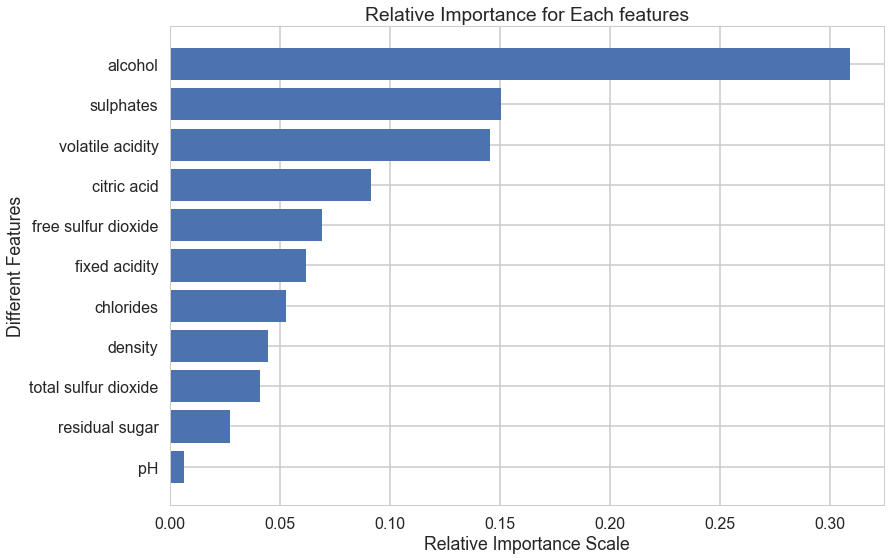

In [33]:
important_list, name_list = zip(*sorted(zip(important_list, name_list)))
plt.barh(range(len(name_list)),important_list,align='center')
plt.yticks(range(len(name_list)), name_list)
plt.title('Relative Importance for Each features')
plt.ylabel('Different Features')
plt.xlabel('Relative Importance Scale')

In [14]:
def cv_optimize(clf, parameters, xtrain, ytrain, score_func, n_folds):
    gs = GridSearchCV(clf, parameters, cv = n_folds, scoring = score_func)
    gs.fit(xtrain, ytrain)
    clf = gs.best_estimator_
    print('Best Parameter is: ', gs.best_params_)
    print('Best Scoring is: ', gs.best_score_)
    
    return clf

In [57]:
def tree_classification(clf, parameters, df, features, target, targetvalue1, score_func, n_folds):
    X = df[features].values
    Y = df[target].values
    Y = (Y >= targetvalue1)*1.
    
    xtrain = X[mask]
    ytrain = Y[mask]
    xtest = X[~mask]
    ytest = Y[~mask]
    
    clf = cv_optimize(clf, parameters, xtrain, ytrain, score_func, n_folds)
    clf.fit(xtrain, ytrain)
    
    ypred = clf.predict(xtest)
    cm = confusion_matrix(ytest, ypred)
    accuracy_train = accuracy_score(ytrain, clf.predict(xtrain))
    accuracy_test = accuracy_score(ytest, ypred)
    
    print('Confusion Matrix: \n', cm)
    print('===========================')
    print('Accuracy on Training set: %0.2f%%' % (accuracy_train*100))
    print('Accuracy on Testing set: %0.2f%%' % (accuracy_test*100))
    
    return clf, xtrain, ytrain, xtest, ytest

### Decision Tree with Two co-variates

In [108]:
clf = tree.DecisionTreeClassifier()
parameter = {'max_depth': np.arange(2,8), 'min_samples_leaf': np.arange(2,8)}

clf, xtrain, ytrain, xtest, ytest = tree_classification(clf, parameter, df, ['alcohol', 'sulphates'], 'quality', 7, 'f1', 5)

C:\Users\Seuphor\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Seuphor\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Seuphor\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Seuphor\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Seuphor\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113:

Best Parameter is:  {'min_samples_leaf': 6, 'max_depth': 3}
Best Scoring is:  0.430971752552
Confusion Matrix: 
 [[266  10]
 [ 32  12]]
Accuracy on Training set: 88.90%
Accuracy on Testing set: 86.88%


In [109]:
xmin, xmax = min(xtrain[:,0]), max(xtrain[:,0])
ymin, ymax = min(xtrain[:,1]), max(xtrain[:,1])

np.arange(xmin, xmax, 0.05), np.arange(ymin, ymax, 0.05)

(array([  8.4 ,   8.45,   8.5 ,   8.55,   8.6 ,   8.65,   8.7 ,   8.75,
          8.8 ,   8.85,   8.9 ,   8.95,   9.  ,   9.05,   9.1 ,   9.15,
          9.2 ,   9.25,   9.3 ,   9.35,   9.4 ,   9.45,   9.5 ,   9.55,
          9.6 ,   9.65,   9.7 ,   9.75,   9.8 ,   9.85,   9.9 ,   9.95,
         10.  ,  10.05,  10.1 ,  10.15,  10.2 ,  10.25,  10.3 ,  10.35,
         10.4 ,  10.45,  10.5 ,  10.55,  10.6 ,  10.65,  10.7 ,  10.75,
         10.8 ,  10.85,  10.9 ,  10.95,  11.  ,  11.05,  11.1 ,  11.15,
         11.2 ,  11.25,  11.3 ,  11.35,  11.4 ,  11.45,  11.5 ,  11.55,
         11.6 ,  11.65,  11.7 ,  11.75,  11.8 ,  11.85,  11.9 ,  11.95,
         12.  ,  12.05,  12.1 ,  12.15,  12.2 ,  12.25,  12.3 ,  12.35,
         12.4 ,  12.45,  12.5 ,  12.55,  12.6 ,  12.65,  12.7 ,  12.75,
         12.8 ,  12.85,  12.9 ,  12.95,  13.  ,  13.05,  13.1 ,  13.15,
         13.2 ,  13.25,  13.3 ,  13.35,  13.4 ,  13.45,  13.5 ,  13.55,
         13.6 ,  13.65,  13.7 ,  13.75,  13.8 ,  13.85,  13.9 , 

In [110]:
xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.05), np.arange(ymin, ymax, 0.05))
Xplot = np.c_[xx.ravel(), yy.ravel()]

In [111]:
area = clf.predict(Xplot)
area = area.reshape(xx.shape)


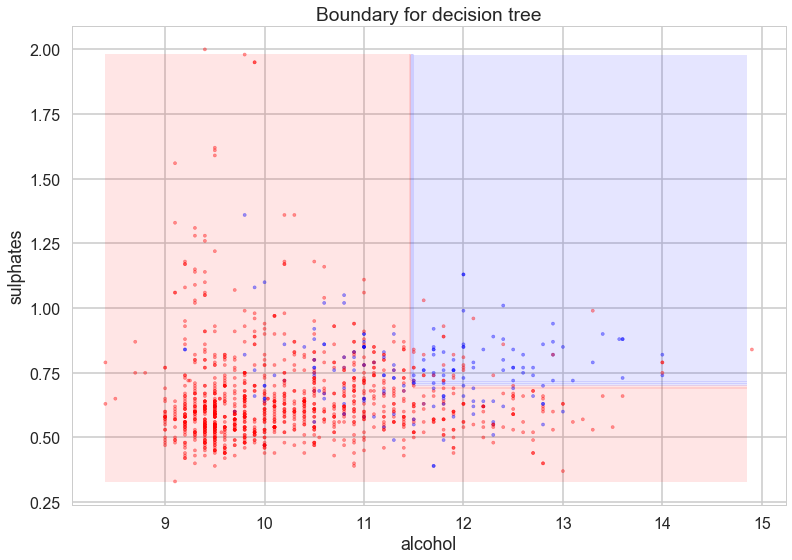

In [143]:
from matplotlib.colors import ListedColormap
colormap = ListedColormap(['#ff0000', '#0000ff'])
plt.contourf(xx, yy, area, alpha = 0.1, cmap = colormap)
plt.scatter(xtrain[:,0], xtrain[:,1], c=ytrain, cmap = colormap, s = 10, alpha = 0.4)
plt.xlabel('alcohol')
plt.ylabel('sulphates')
plt.title('Boundary for decision tree')

### Random Forest

In [152]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
parameters = {'n_estimators': range(10, 30), 'max_features': range(2,7)}
clf, xtrain, ytrain, xtest, ytest = tree_classification(clf, parameters, df, df.columns[0:11], 'quality', 7, 'f1', 5)


Best Parameter is:  {'n_estimators': 19, 'max_features': 6}
Best Scoring is:  0.438372870859
Confusion Matrix: 
 [[266  10]
 [ 20  24]]
Accuracy on Training set: 99.92%
Accuracy on Testing set: 90.62%


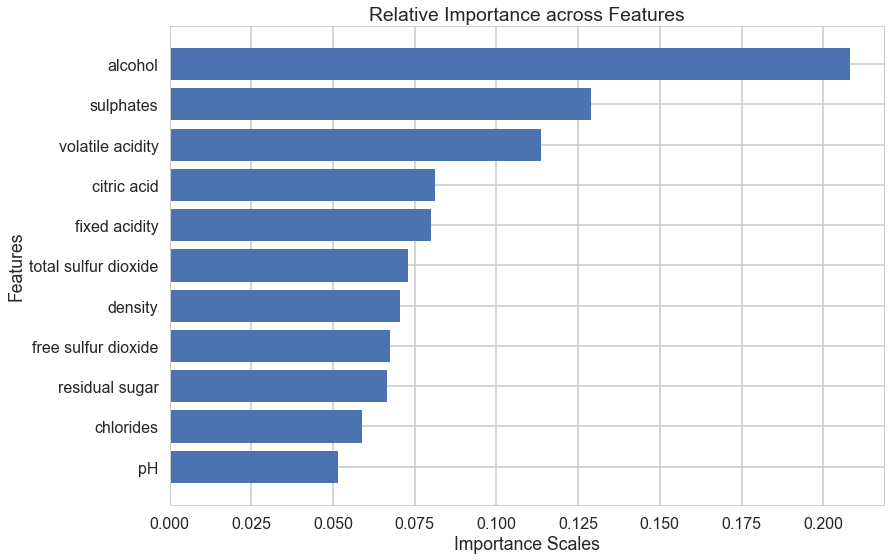

In [163]:
list_importance = clf.feature_importances_
list_name = df.columns
list_importance, list_name = zip(*sorted(zip(list_importance, list_name)))
plt.barh(np.arange(len(list_name)), list_importance)
plt.yticks(np.arange(len(list_name)), list_name)
plt.title('Relative Importance across Features')
plt.ylabel('Features')
plt.xlabel('Importance Scales')

### Adaboost Classifier

In [169]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
parameters = {'n_estimators': np.arange(10,50), 'learning_rate': [.5 , .75, 1]}
clf, xtrain, ytrain, xtest, ytest = tree_classification(clf, parameters, df, df.columns[0:11], 'quality', 7, 'f1', 5)

Best Parameter is:  {'n_estimators': 34, 'learning_rate': 1}
Best Scoring is:  0.368536352216
Confusion Matrix: 
 [[264  12]
 [ 28  16]]
Accuracy on Training set: 90.30%
Accuracy on Testing set: 87.50%


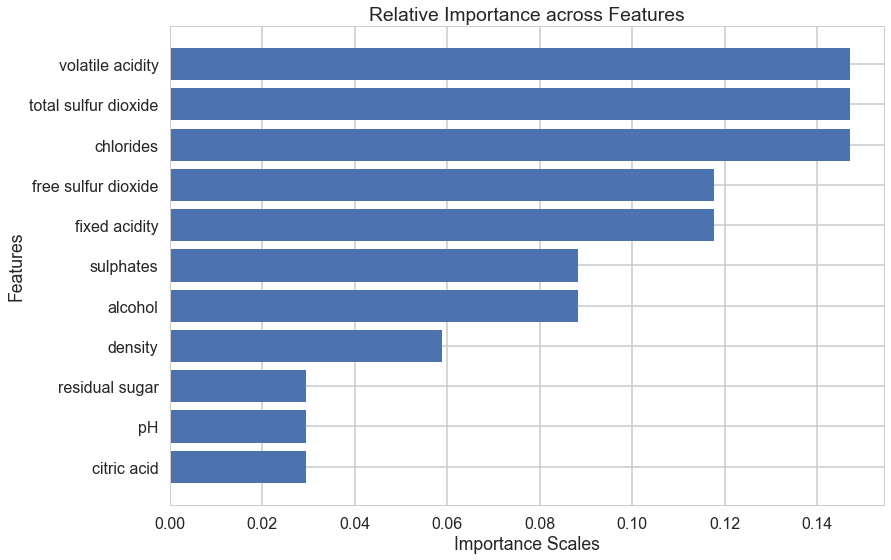

In [170]:
list_importance = clf.feature_importances_
list_name = df.columns
list_importance, list_name = zip(*sorted(zip(list_importance, list_name)))
plt.barh(np.arange(len(list_name)), list_importance)
plt.yticks(np.arange(len(list_name)), list_name)
plt.title('Relative Importance across Features')
plt.ylabel('Features')
plt.xlabel('Importance Scales')